In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt

# Assuming this notebook is in 'notebooks/', go up one level
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(project_root)

# Now you can import
from phase_retrieval.red import oversample_2d, RED_ITA_F_2d, example_denoiser_2d


In [2]:
penguin = np.load('/Users/mohahmed/Documents/ConvergentBeam/Codes/reference/Ground_truth.npy')

penguin_ft = np.fft.fftshift(np.fft.fft2(penguin))
penguin_back = np.fft.ifft2(np.fft.ifftshift(penguin_ft))



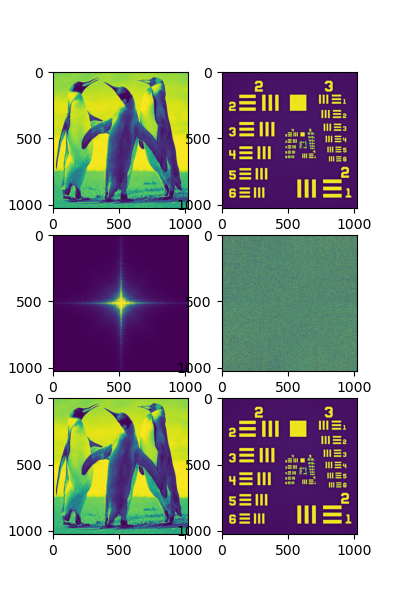

In [3]:
%matplotlib ipympl
fig, ax = plt.subplots(3,2, figsize = (4,6))
ax[0,0].imshow(np.abs(penguin))
ax[0,1].imshow(np.angle(penguin))
ax[1,0].imshow(np.abs(penguin_ft), vmax = 1e3)
ax[1,1].imshow(np.angle(penguin_ft))
ax[2,0].imshow(np.abs(penguin_back))
ax[2,1].imshow(np.angle(penguin_back))

In [ ]:
# Synthetic 2D signal (image)
x_true = penguin  # rectangular patch
n_shape = x_true.shape

oversampling_factor = 2
m_shape = (n_shape[0] * oversampling_factor, n_shape[1] * oversampling_factor)

# Generate measurements y = |F O_{mn} x_true|
x_oversampled = oversample_2d(x_true, m_shape)
y = np.abs(np.fft.fft2(x_oversampled))

# Parameters
rho = 1.0
lambd = 0.1
max_iter = 100

# Run RED-ITA-F 2D
x_rec = RED_ITA_F_2d(y, n_shape, rho, lambd, example_denoiser_2d, max_iter)


Iter 1/100, Residual: 1.73758e+06
Iter 11/100, Residual: 1.73758e+06
Iter 21/100, Residual: 1.73758e+06
Iter 31/100, Residual: 1.73758e+06
Iter 41/100, Residual: 1.73758e+06
Iter 51/100, Residual: 1.73758e+06
Iter 61/100, Residual: 1.73758e+06
Iter 71/100, Residual: 1.73758e+06
Iter 81/100, Residual: 1.73758e+06
Iter 91/100, Residual: 1.73758e+06
Iter 100/100, Residual: 1.73758e+06


AttributeError: module 'numpy' has no attribute 'ans'

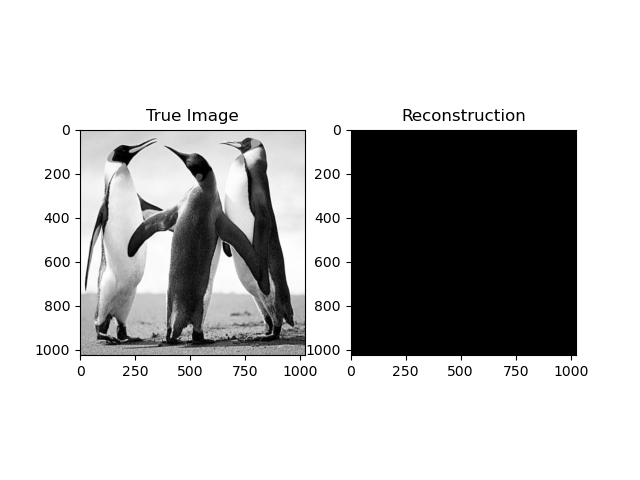

In [8]:
import matplotlib.pyplot as plt
plt.figure()
plt.subplot(1, 2, 1)
plt.title("True Image")
plt.imshow(np.abs(x_true), cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Reconstruction")
plt.imshow(x_rec.real, cmap='gray')
plt.show()